In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
temp_data = pd.read_csv('graph.csv', low_memory=False)
temp_data.head()

,year,no_Smoothing,lowess(5)
0,1880,-0.20,-0.13
1,1881,-0.12,-0.16
2,1882,-0.10,-0.19
3,1883,-0.21,-0.21
4,1884,-0.28,-0.24


[1875, 2020, -0.6, 1.1]

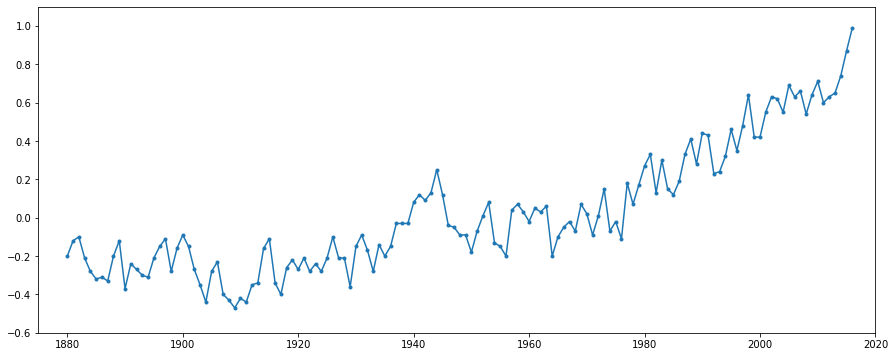

In [3]:
x_axe = temp_data['year']
y_axe = temp_data['no_Smoothing']

plt.figure(figsize=(15, 6))
plt.plot(x_axe, y_axe, '.-')
plt.axis([1875,2020,-0.6,1.1])

In [4]:
dateparse = (lambda dates: pd.datetime.strptime(dates, '%Y-%m') )

In [5]:
data = pd.read_csv('AirPassengers.csv', index_col='Month',date_parser=dateparse) 
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# Transformando o dataframe numa Serie com data = Passengers
ts = data['Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64

In [7]:
ts['1949'] 

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64

/home/amanda/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


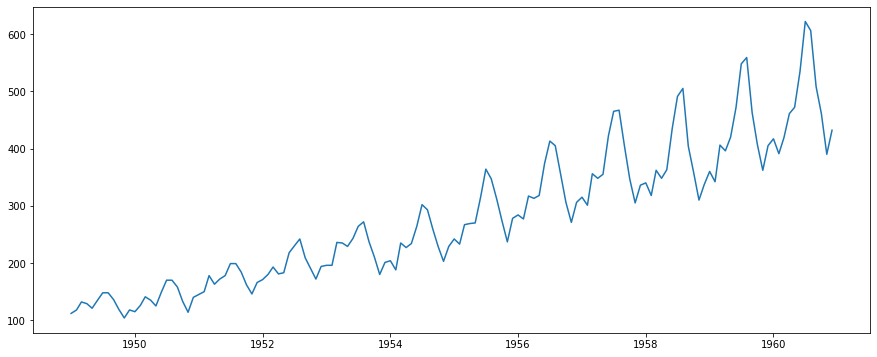

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(ts)

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

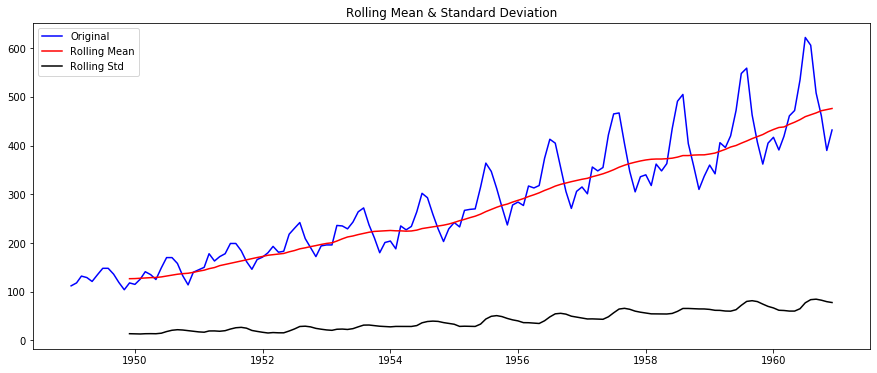

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
test_stationarity(ts)

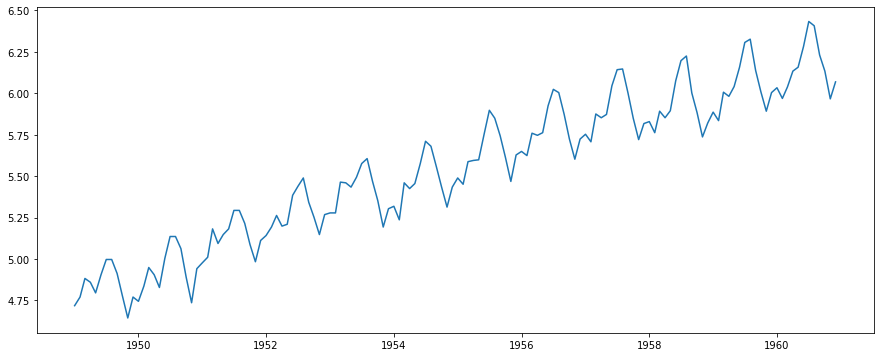

In [22]:
# Aplicando Log para IDENTIFICAR a tendência da TS 
ts_log = np.log(ts)
plt.figure(figsize=(15, 6))
plt.plot(ts_log)

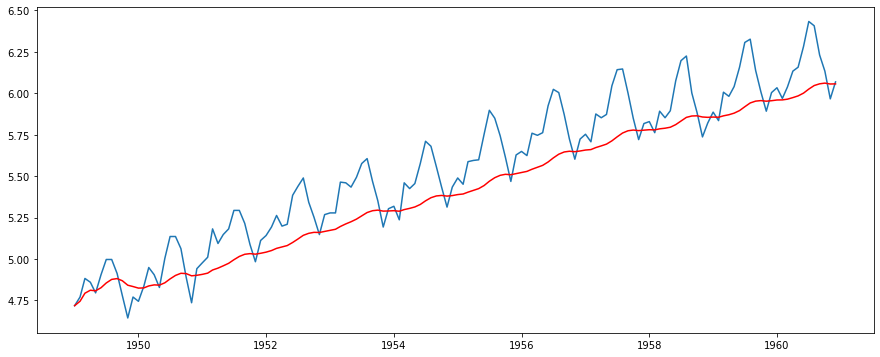

In [28]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.figure(figsize=(15, 6))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

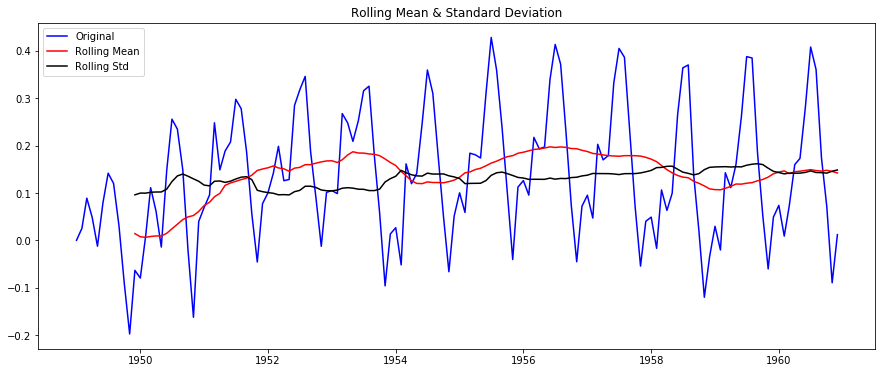

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [29]:
ts_log_ewma_diff = ts_log - expwighted_avg 
test_stationarity(ts_log_ewma_diff)

In [36]:
# Transformando o Dataframe de temp globais em Serie
glob_copy = temp_data.copy()
glob_copy = glob_copy.drop(columns=['lowess(5)'])
glob_copy = glob_copy.set_index('year')

glob_ts = glob_copy['no_Smoothing']
glob_ts.head(10)

year
1880   -0.20
1881   -0.12
1882   -0.10
1883   -0.21
1884   -0.28
1885   -0.32
1886   -0.31
1887   -0.33
1888   -0.20
1889   -0.12
Name: no_Smoothing, dtype: float64

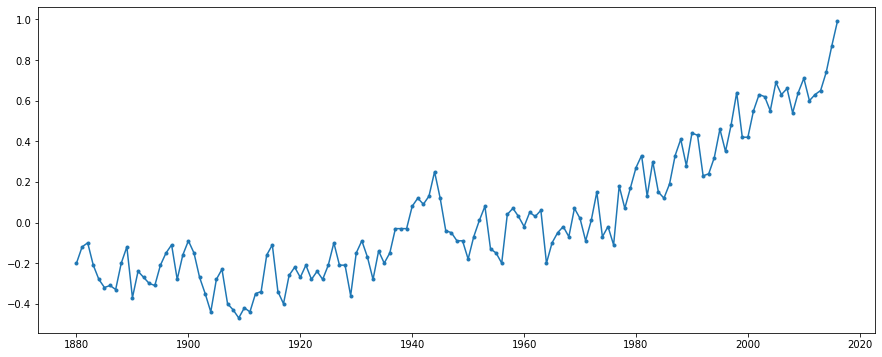

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(glob_ts, '.-')

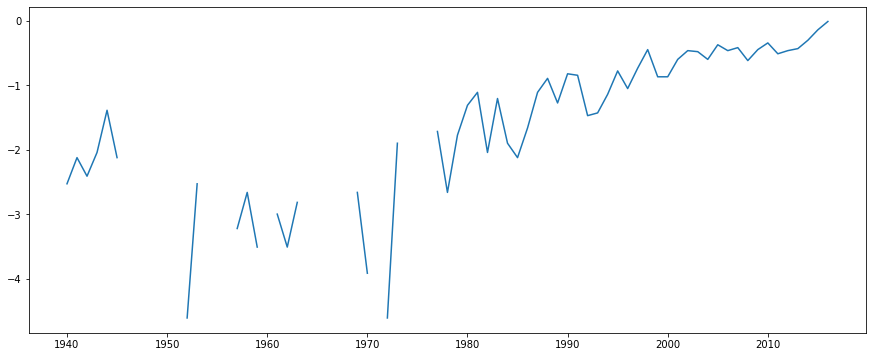

In [42]:
# Aplicando Log para IDENTIFICAR a tendência da TS 
glob_ts_log = np.log(glob_ts)
plt.figure(figsize=(15, 6))
plt.plot(glob_ts_log)

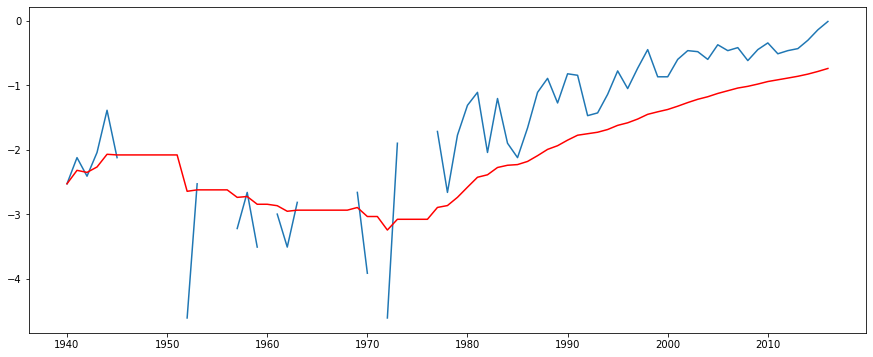

In [43]:
expwighted_avg_glob = glob_ts_log.ewm(halflife=12).mean()
plt.figure(figsize=(15, 6))
plt.plot(glob_ts_log)
plt.plot(expwighted_avg_glob, color='red')

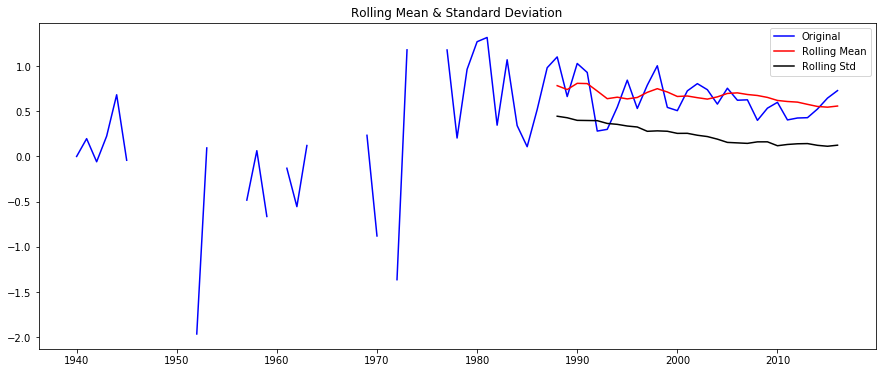

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [44]:
glob_ts_log_ewma_diff = glob_ts_log - expwighted_avg_glob 
test_stationarity(glob_ts_log_ewma_diff)